**Project "Prioritization of hypotheses to increase sales."**

During the implementation of the project, the hypotheses for increasing sales put forward together with the marketing department will be prioritized.
**The main goal of the project** is to make a decision on the advisability of further testing.

**Project structure:**
    
1. Data loading and preprocessing
2. Prioritization of hypotheses
3. Application of the ICE framework
4. Application of the RICE framework
5. A/B test analysis
6. Making a decision. Analysis results

**Part 1. Loading data.**


**Part 2. Hypothesis prioritization.**

There are 9 hypotheses in the hypothesis.csv file to increase the revenue of the online store
with the specified parameters Reach, Impact, Confidence, Effort.

- Apply the ICE framework to prioritize hypotheses.
- Apply the RICE framework to prioritize hypotheses.
- Let's show how the prioritization of hypotheses has changed when using RICE instead of ICE. Why did it happen?

**Part 3: A/B Test Analysis**

Based on the results, let's analyze the A/B test:
- [x] Let's build a graph of cumulative revenue by groups. Let's make conclusions and assumptions.
- [x] Let's build a graph of the cumulative average bill by groups. Let's make conclusions and assumptions.
- [x] Let's build a graph of the relative change in the cumulative average check of group B to group A. Let's draw conclusions and assumptions.
- [x] Let's build a graph of cumulative conversion by groups. Let's make conclusions and assumptions.
- [x] Let's plot the relative change in the cumulative conversion of group B to group A. Let's draw conclusions and assumptions.
- [x] Let's build a scatter plot of the number of orders by users. Let's make conclusions and assumptions.
- [x] Calculate the 95th and 99th percentiles of orders per user. Select a boundary to identify anomalous users.
- [x] Let's build a point chart of order costs. Let's make conclusions and assumptions.
- [x] Let's calculate the 95th and 99th percentiles of order value. Select a border to detect anomalous orders.
- [x] Let's calculate the statistical significance of differences in conversion between groups according to the "raw" data. Let's make conclusions and assumptions.
- [x] Let's calculate the statistical significance of the differences in the average check of the order between the groups according to the "raw" data. Let's make conclusions and assumptions.
- [x] Let's calculate the statistical significance of differences in conversion between groups according to the "cleaned" data. Let's make conclusions and assumptions.
- [x] Let's calculate the statistical significance of the differences in the average check of the order between the groups according to the "cleaned" data. Let's make conclusions and assumptions.

**Part 4. Making a decision on the results of the test. Solution options:**

1. Stop the test, record the victory of one of the groups.
2. Stop the test, record the absence of differences between groups.
3. Continue the test.

## Data loading and preprocessing

In [1]:
# loading libraries

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
# converters that allow you to use pandas types in matplotlib 
register_matplotlib_converters()

In [2]:
# set the column width so that the rows are fully visible
pd.set_option('max_colwidth', 130) 

hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# load data, convert date

orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [4]:
orders.info()
orders.head(3)
print()
visitors.info()
visitors.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


In [5]:
# check for duplicates
print('Duplicates orders', orders.duplicated().sum())
print('Duplicates visitors', visitors.duplicated().sum())

Duplicates orders 0
Duplicates visitors 0


## Prioritization of hypotheses

### Apply the ICE framework

The ICE framework is used to prioritize hypotheses. ICE (impact, confidence, effort) Sort them in descending order of priority.

In [6]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display((hypothesis.loc[:,['Hypothesis', 'ICE']]).sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Let's apply the framework RICE

The RICE framework is used to prioritize hypotheses. Sort them in descending order of priority.

The RICE framework consists of four components:
- Reach - how many users will be affected by the change you want to make;
- Impact - how much the change will affect users, their experience and satisfaction with the product;
- Confidence - how confident are you that this change will affect users in this way;
- Efforts - how much it costs to test this hypothesis.

In [7]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display((hypothesis.loc[:,['Hypothesis', 'RICE']]).sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


TOP 3 by ICE criterion
1. Launch a promotion that gives a discount on goods on your birthday
2. Add two new channels to attract traffic, which will attract 30% more users
3. Add a subscription form to all main pages to build a customer base for email newsletters

TOP 3 according to the RICE criterion
1. Add a subscription form to all main pages to build a customer base for email newsletters
2. Add blocks of product recommendations to the website of the online store to increase conversion and average check of the order
3. Add two new channels to attract traffic, which will attract 30% more users


Obviously, this change in priorities is due to the fact that the ICE framework does not use the "user reach" indicator. It can be assumed that the choice of this criterion will be preferable, since it is more complete.

### A/B test analysis

The results of the A/B test are described in the files:
- orders.csv
- visitors.csv

### For a correct comparison of two groups, we calculate and remove users from both groups

In [8]:
# group data into two groups

display(orders.groupby(by='group')['visitorId'].count())

group
A    557
B    640
Name: visitorId, dtype: int64

In [9]:
gr_A = orders[orders['group'] == 'A']['visitorId'].tolist()
gr_B = orders[orders['group'] == 'B']['visitorId'].tolist()

# create a new table, without users who belonged to both groups
orders = orders.query(
    '(visitorId in @gr_A and visitorId not in @gr_B or (visitorId in @gr_B and visitorId not in @gr_A))')

display(orders.groupby(by='group')['visitorId'].count())

group
A    468
B    548
Name: visitorId, dtype: int64

### Let's build a graph of cumulative revenue by groups.

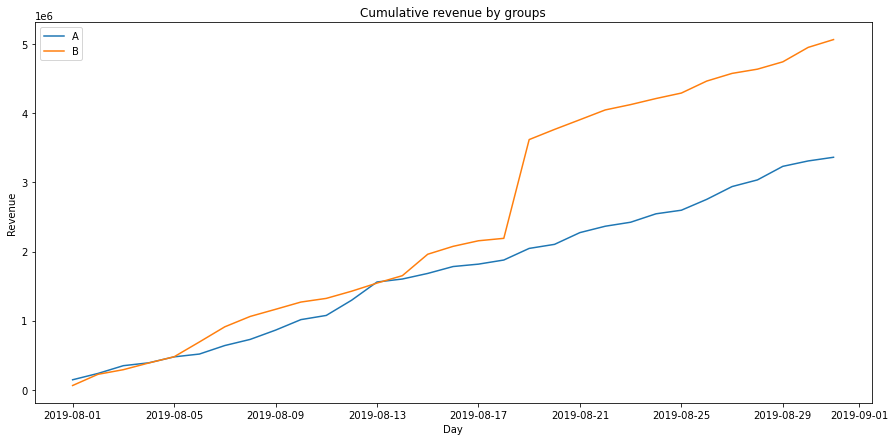

In [10]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title("Cumulative revenue by groups") 
plt.xlabel("Day") 
plt.ylabel("Revenue")
plt.legend(); 

The graph shows that segment B and A have approximately equal sales up to 11-15. Since August 15, group B has been significantly ahead of group A. This may be due to abnormally large orders.

### Let's build a graph of the cumulative average bill by groups.

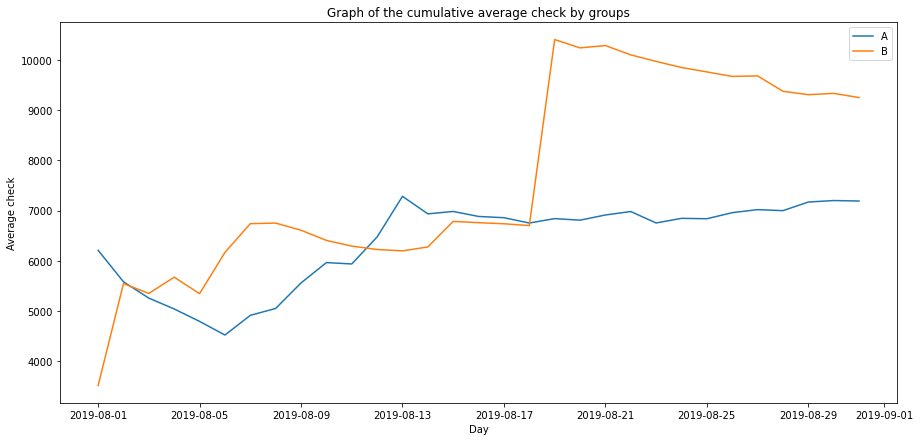

In [11]:
plt.figure(figsize=(15,7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')

plt.title("Graph of the cumulative average check by groups") 
plt.xlabel("Day") 
plt.ylabel("Average check")
plt.legend();

It can be seen from the graph that the average check of group B on the 9th-14th day is less than group A, but after the 17th day group B went up sharply, this may also indicate a distortion of the data due to abnormal sales.

### Let's build a graph of the relative change in the cumulative average check of group B to group A

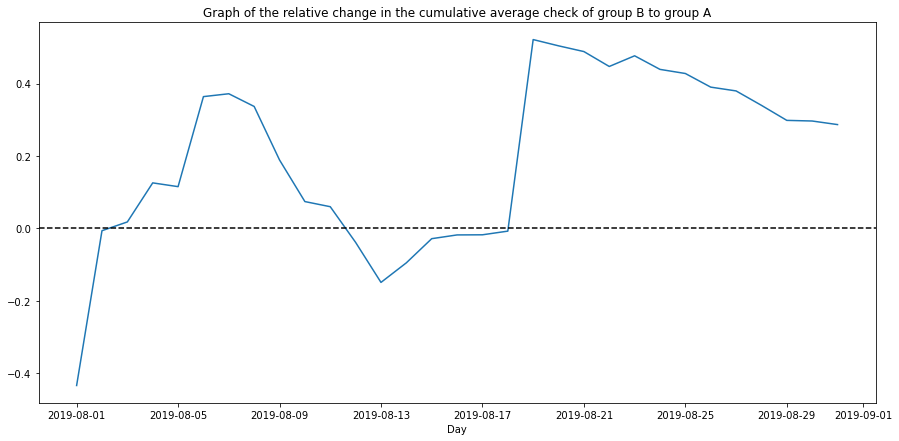

In [12]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title("Graph of the relative change in the cumulative average check of group B to group A") 
plt.xlabel("Day") 

# add y axis
plt.axhline(y=0, color='black', linestyle='--');

On this chart, we also observe "jumps", this can also indicate abnormally high sales.

### Let's build a graph of cumulative conversion by groups.

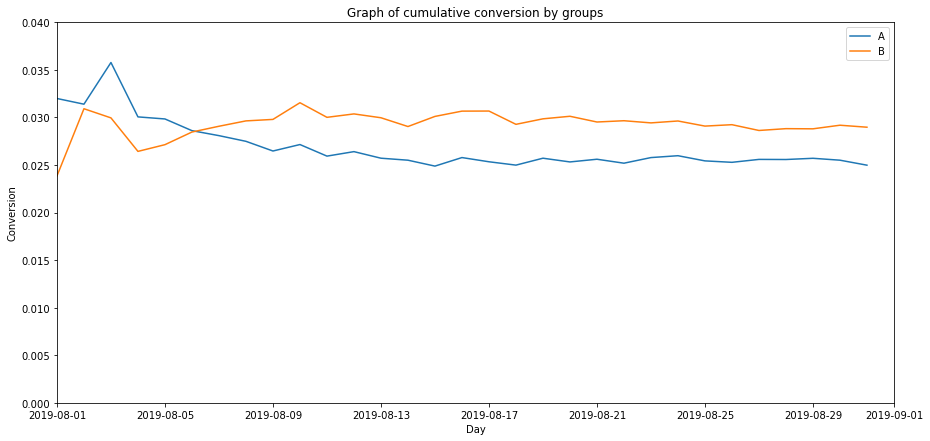

In [13]:
# add a column with conversion
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']


plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title("Graph of cumulative conversion by groups") 
plt.xlabel("Day") 
plt.ylabel("Conversion")
plt.legend()

# add a scale of the axes so that you can see the absolute value of the oscillation
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.04]);

* The conversion of group B after August 5 became higher and until the end of the test, the conversion was approximately the same.
* The graph shows that the overall fluctuation for the two groups was in the range of 0.03 to 0.037.

### Let's plot the relative change in the cumulative conversion of group B to group A.

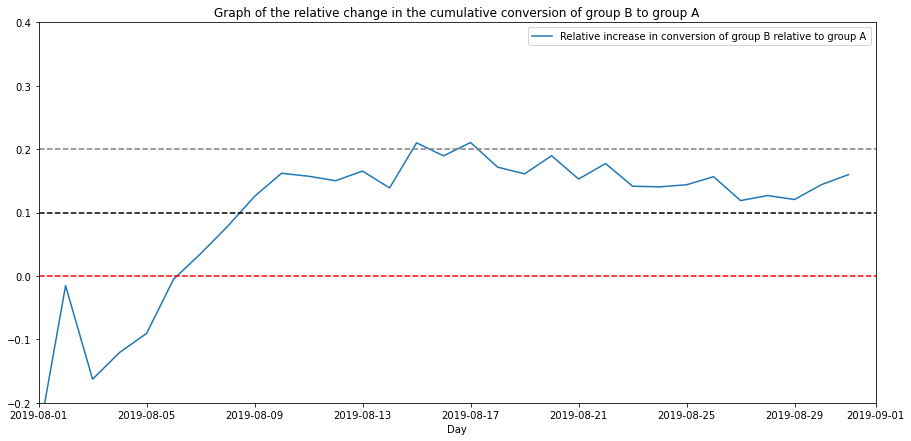

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Relative increase in conversion of group B relative to group A")
plt.title("Graph of the relative change in the cumulative conversion of group B to group A") 
plt.xlabel("Day") 
plt.legend()

# axes y
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.4]);

* The conversion of group B after the 7th day became higher than group A and reached 20%
* After the 17th, the conversion began to decline and reached 10% relative to group A

### Data cleaning from outliers. Definition of outliers.

#### Let's build a dot plot of the number of orders by users

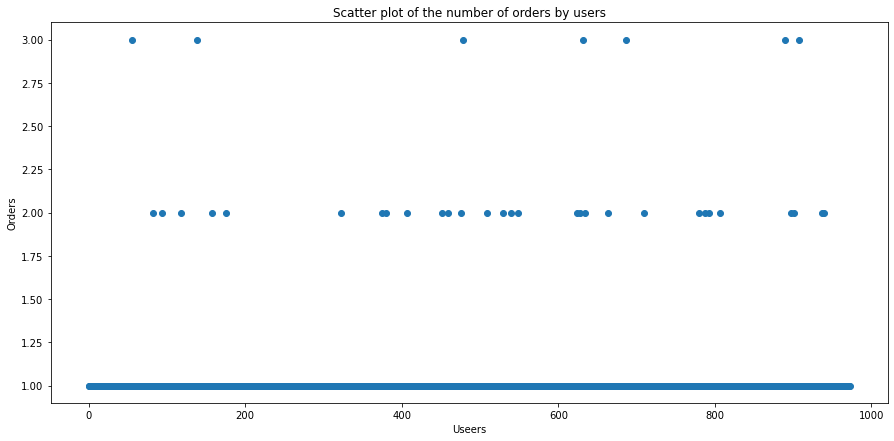

In [16]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

# print(ordersByUsers.sort_values(by='orders', ascending=False))

# a series of numbers from 0 to the number of observations inordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15,7))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Scatter plot of the number of orders by users") 
plt.xlabel("Useers") 
plt.ylabel("Orders");

There are quite a few users who made more than three orders, we can say that these are abnormal sales.

### Let's calculate the 95th and 99th percentiles of orders per user.

In [17]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


We will choose a border to determine abnormal users:
* No more than 5% of users made more than 1 orders
* No more than 1% of users made more than 2 orders
* Set the border of abnormal users who have completed 2 orders

### We build a point schedule of orders.

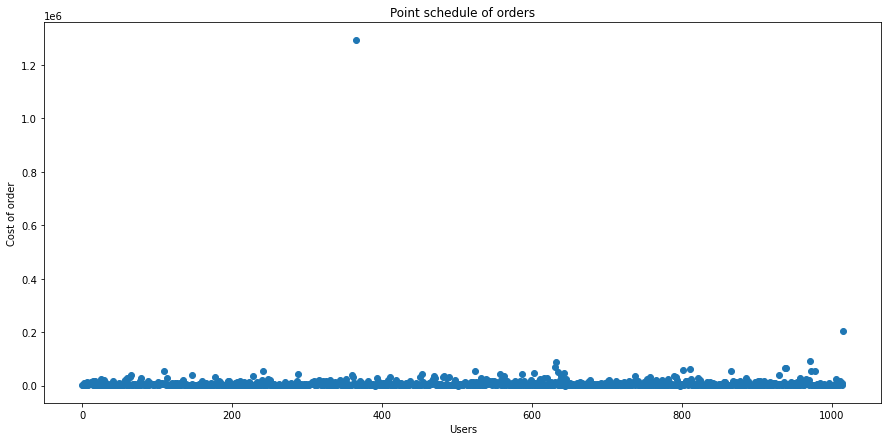

In [18]:
# print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,7))
plt.scatter(x_values, orders['revenue'])
plt.title("Point schedule of orders") 
plt.xlabel("Users") 
plt.ylabel("Cost of order");

On the schedule, you can determine two emissions:
* about 200 000
* about 1 200 000

### Let's calculate the 95th and 99th percented the cost of orders.

In [19]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Let's choose a border to determine anomalous orders:
* no more than 5% of orders more than 26785 rubles
* no more than 1% of orders more than 53904 rubles
* set the border of abnormal orders 20,000 rubles

Checking the hypotheses according to raw data (without removing the outlets)

### P-Value in the conversion between groups of "raw" data

We will form zero and alternative hypotheses:
* Zero hypothesis: conversions between groups in “raw” data is equal

* Alternative hypothesis: conversions between groups in “raw” data varies

In [20]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(3))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
 
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
 
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
 
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# critical level of statistical significance
alpha = 0.05  


if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:

    print('Reject the zero hypothesis: the difference is statistically significant, p-value =', 
          "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])) 
else:
    print(
        'We take zero hypothesis: the difference is not statistically significant, p-value =', 
        "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
    
    
print( 
 "{0:.3f}".format( 
 (data['ordersPerDateB'].sum() / data['visitorsPerDateB'].sum()) 
 / (data['ordersPerDateA'].sum() / data['visitorsPerDateA'].sum()) 
        - 1
    )
)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803


Reject the zero hypothesis: the difference is statistically significant, p-value = 0.01102
0.160


Findings:
* in the conversion between groups in “raw” data varies
* The relative difference of the middle group B to the conversion of the group A = 13.8%

### p-value In the average order check between groups for "raw" data

We will form zero and alternative hypotheses:

- zero hypothesis: the average check between the groups in the "raw" data is equal

- Alternative hypothesis: the average check between groups in “raw” data varies

In [21]:
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < alpha:

    print('We reject the zero hypothesis: the average check between the “raw” data varies varies , p-value =', 
          '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                              orders[orders['group']=='B']['revenue'])[1])
         ) 
else:
    print(
        'It was not possible to reject the zero hypothesis, the average check between the groups in the "raw" data is equal, p-value =', 
        '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                            orders[orders['group']=='B']['revenue'])[1])
    )

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

It was not possible to reject the zero hypothesis, the average check between the groups in the "raw" data is equal, p-value = 0.829
0.287


Findings:
* The average check between the groups in the "raw" data are equal
* The relative difference of the average check in the conversion of the group A = 28.7%

The difference is the difference of 28.7 % in average checks is not statistically significant, but you need to pay attention to the fact that it is quite large.

### Clean data

In [22]:
# np.percentile(orders['revenue'], [95, 99])[1] around 40 000
# A given border by manually

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[1]]['visitorId'],
    ],
    axis=0,
)


usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[1]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print()
# shape[0] length ot the table
print('Abnormal users', abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64

Abnormal users 16


### p-value in the conversion between groups in "purified" data

We will form zero and alternative hypotheses:
* Zero hypothesis: conversions between groups in "purified" data is equal

* Alternative hypothesis: conversions between groups in "purified" data varies

In [23]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:

    print('We reject the zero hypothesis: conversions between groups in “purified” data differs, p-value =', 
          '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])) 
else:
    print(
        'It was not possible to reject the zero hypothesis, the conversions between the groups according to the "purified" data are equal, p-value =', 
        '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

We reject the zero hypothesis: conversions between groups in “purified” data differs, p-value = 0.00702
0.189


Conclusion
- P -Value - decreased from 0.01381 to 0.00702
- both raw and in processed data are statistical significance.
- 18.9% sufficient statistical significance

### p-value In the average order check between groups for "purified" data

We will form zero and alternative hypotheses:

Zero hypothesis: the average check between groups in “purified” data is equal

Alternative hypothesis: the average check between groups in “purified” data varies

In [24]:
if stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1] < alpha:

    print('We take an alternative hypothesis: the average check between the groups in “purified” data varies , p-value =', 
          '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1])
         ) 
else:
    print('We take zero hypothesis, the average check between groups in “purified” data is equal, p-value =',
        '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1])
    )



print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

We take zero hypothesis, the average check between groups in “purified” data is equal, p-value = 0.788
-0.032


Findings:
- P-Value has changed from 0.01679 to 0.788, but there are still no statistically significant differences

- the relative difference between the average check between the groups became negative 0.32%

With alpha = 0.05 (critical level of statistical significance), the relative difference is not statistically significant.

### Decision-making. The results of the analysis.

** Options for further actions **

1. Stop the test, fix the victory of one of the groups.
2. Stop the test, fix the absence of differences between groups.
3. Continue the test.

** We will summarize: **
- based on the graph, it is clearly seen that the cumulative revenue of group B is above
- based on the graph, it is clearly seen that the cumulative average check of group B is above
- based on the graph, it is clearly seen that the cumulative conversion of group B is above


**With a critical level of statistical significance Alpha = 0.05:**

* The conversion between groups in “raw” data varies
* The average checks between groups in the "raw" data are equal
* The relative difference of the average check in the conversion of the group A = 28.7%

* reject the zero hypothesis: conversions between groups in “purified” data varies
* The average checks between groups in "" purified "data are equal

Focusing on the graphs and a large conversion of the relative difference between the average check of the group B to group A equal to 28.7%, we decide, stop the test. Recognize the victory of the group in group A.